# Table of contents
## Creating profiles, cont
## Creating a visualization
## Aggregation of profiles

In [2]:
#setting up to continue where we left off
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\Admin\Documents\Dec 22 Instacart Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_active_custs.pkl'))

In [5]:
#we're going to make our own function here, since we need to go through the whole data but also an 'other' column for customers who don't fit these profiles
#I also added a couple more profile types
def profile(row):

  if (row['age'] >= 18) and (row['marital_status'] in 'married') and (row['age'] < 55) and (row['annual_income'] <= 50000) and (row['n_dependents'] >= 1):
    return 'Low income family'
  elif (row['age'] >= 18) and (row['age'] < 55) and (row['marital_status'] in 'single') and (row['n_dependents'] >= 1):
    return 'Single parent'
  elif (row['age'] >= 18) and (row['age'] < 55) and (row['annual_income'] >= 100000) and (row['n_dependents'] >= 1):
    return 'Wealthy family'
  elif (row['age'] >= 18) and (row['age'] < 25) and (row['marital_status'] in 'single') and (row['annual_income'] < 20000) and (row['n_dependents'] < 1):
    return 'College student'
  elif (row['age'] >= 27) and (row['age'] < 42) and (row['annual_income'] < 50000) and (row['n_dependents']) < 1:
    return 'Struggling millenial'
  elif (row['age'] >= 30) and (row['age'] < 60) and (row['annual_income'] > 75000) and (row['n_dependents'] < 1):
    return 'Career-oriented'
  elif (row['age'] >= 60) and (row['n_dependents'] < 1):
    return 'Senior citizen'
  else: return 'Other'
#not everyone will fit into a distinct category like this obviously, I just tried to picture the most likely groups to use Instacart

In [6]:
#now we make the new column that applies this function
df['customer_profile'] = df.apply(profile, axis=1)

In [42]:
df.head(25)

,user_id,gender,state,age,date_joined,n_dependents,marital_status,annual_income,Unnamed: 0_x,order_id,...,max_order,loyalty_flag,order_cost,avg_spent_per_item,spender_type,order_frequency,frequency_flag,region,active_flag,customer_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,443895,2543867,...,8,New customer,17,7.666667,Low spender,19.0,Regular customer,Midwest,Active,Wealthy family
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,443897,1285508,...,8,New customer,25,7.666667,Low spender,19.0,Regular customer,Midwest,Active,Wealthy family
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,443898,2578584,...,8,New customer,25,7.666667,Low spender,19.0,Regular customer,Midwest,Active,Wealthy family
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,443892,423547,...,8,New customer,12,7.666667,Low spender,19.0,Regular customer,Midwest,Active,Wealthy family
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,443893,2524893,...,8,New customer,23,7.666667,Low spender,19.0,Regular customer,Midwest,Active,Wealthy family
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,443894,2984525,...,8,New customer,16,7.666667,Low spender,19.0,Regular customer,Midwest,Active,Wealthy family
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,443896,2505178,...,8,New customer,16,7.666667,Low spender,19.0,Regular customer,Midwest,Active,Wealthy family
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,443897,1285508,...,8,New customer,25,7.666667,Low spender,19.0,Regular customer,Midwest,Active,Wealthy family
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,443898,2578584,...,8,New customer,25,7.666667,Low spender,19.0,Regular customer,Midwest,Active,Wealthy family
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,443891,518967,...,8,New customer,4,7.666667,Low spender,19.0,Regular customer,Midwest,Active,Wealthy family


In [45]:
df['customer_profile'].value_counts(dropna = False)

Other                   20245799
Wealthy family           3841200
Senior citizen           2645271
Career-oriented          2454202
Low income family        1491333
Struggling millenial      286759
Name: customer_profile, dtype: int64

so it doesn't cover everyone, but I'm not honestly sure how else to profile people at this point lol

In [36]:
df.shape

(30964564, 35)

In [23]:
#now we can test each category to see what their most commonly bought items are
df2 = df[df['customer_profile'] == 'Wealthy family']

In [29]:
df2['department_id'].value_counts()

4     1134926
16     653069
7      302467
19     297314
1      268763
13     227576
3      142821
15     132435
20     123109
9      106875
12      91205
17      89458
14      81541
18      55550
11      53479
6       32901
5       20076
8       11707
21       8060
2        4275
10       3593
Name: department_id, dtype: int64

Wealthy families likely buy a lot of produce

In [25]:
df3 = df[df['customer_profile'] == 'Senior citizen']

In [30]:
df3['department_id'].value_counts()

4     777094
16    442602
19    236244
7     220879
1     183957
13    151891
3      95735
20     86749
15     84268
9      70251
17     58446
12     57621
14     56590
11     36313
18     34351
6      21814
5      11859
8       8025
21      5064
2       2842
10      2676
Name: department_id, dtype: int64

In [27]:
df4 = df[df['customer_profile'] == 'Career-oriented']

In [31]:
df4['department_id'].value_counts()

4     734093
16    416929
7     195608
19    189047
1     169971
13    143903
3      91928
15     83617
20     79429
9      66812
12     56302
17     53911
14     51170
18     35469
11     33105
6      21097
5      13489
8       7950
21      5139
2       2778
10      2455
Name: department_id, dtype: int64

I'm inclined to tell the marketing team that pushing specific products based on a profile made from this information won't help at all because everyone seems to have more or less the same buying patterns between both departments and items. 

In [37]:
df['department_id'].value_counts()

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

the profiles I created encompass about a third of the all customers and they all reflect the same habits regarding which departments they shop in. We could make more/more specific profiles but we might run into the same issue, or eventually we get such niche profiles that the marketing team is going to spend a ton of time and money trying to reach out to each and every one. I'm sure this wasn't what the assignment had in mind necessarily but as a professional analyst I'd tell the marketing team that personally, I think they're barking up the wrong tree in trying to promote certain products.  

# making a visualization

<AxesSubplot:>

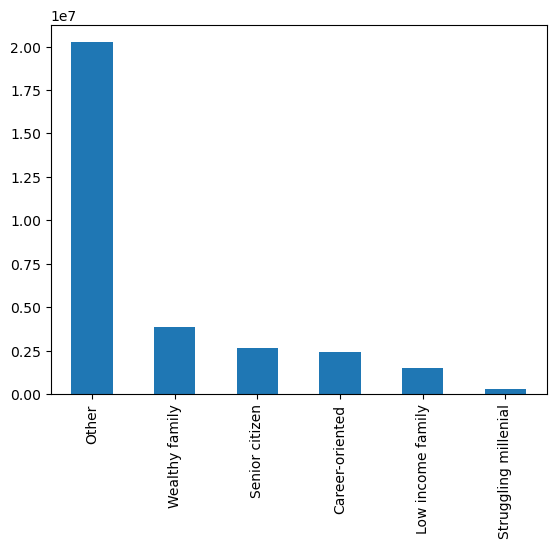

In [46]:
#A bar chart makes the most sense here as it will show you the relative amounts of each group
df['customer_profile'].value_counts().plot.bar()

# Aggregation of profiles

In [49]:
df.groupby('customer_profile').agg({'order_cost': ['max', 'mean', 'min']})

order_cost                
                            max        mean min
customer_profile                               
Career-oriented          100359  233.365417   1
Low income family           588   89.278241   1
Other                    100431  156.370482   1
Senior citizen           100282  169.837346   1
Struggling millenial        666   93.138255   1
Wealthy family           100419  331.325342   1

it looks like that god dang dairy is skewing our data again

In [68]:
#so the order_cost isn't updating with the prices column, but the problem orders make up a pretty teeny tiny section of the data. I might just make those orders NaNs
df.loc[df['order_cost'] >400, 'order_cost'] = np.nan

In [69]:
df.groupby('customer_profile').agg({'order_cost': ['max', 'mean', 'min']})

order_cost                 
                            max        mean  min
customer_profile                                
Career-oriented           400.0  117.450120  1.0
Low income family         400.0   88.250110  1.0
Other                     400.0  115.045965  1.0
Senior citizen            400.0  114.179121  1.0
Struggling millenial      397.0   92.395488  1.0
Wealthy family            400.0  117.910344  1.0

So even though 400 was apparently setting the bar too low in terms of max order cost, the mean is way lower than the max leading me to think $400 orders are still outliers and it's fine to just leave it there since undoing it would require rerunning the whole notebook and that will take all night. 

In [50]:
df.groupby('customer_profile').agg({'order_frequency': ['max', 'mean', 'min']})

order_frequency                
                                 max       mean  min
customer_profile                                    
Career-oriented                 30.0   9.903063  0.0
Low income family               30.0  10.566406  0.0
Other                           30.0   9.935364  0.0
Senior citizen                  30.0   9.874549  0.0
Struggling millenial            30.0  10.577087  0.0
Wealthy family                  30.0   9.880513  0.0

At least these numbers look reasonable lol

I'm going to have to start another notebook because I'm starting to get memory errors again. what a project!

In [ ]:
#exporting the current df so it includes the profiles
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_active_profiles.pkl'))